In [35]:
import pandas as pd
dfc =  pd.read_csv('dfd.csv', usecols= ['FG%','3P%','ORB','DRB','Rk','STL','Team' ,'year', 'covid_1'], index_col = [ 'Team','year'])
dfc

,,Rk,FG%,3P%,ORB,DRB,STL,covid_1
Team,year,,,,,,,
Los Angeles Clippers*,2014,1,0.474,0.352,10.5,32.5,8.6,0
Houston Rockets*,2014,2,0.472,0.358,11.2,34.1,7.6,0
Minnesota Timberwolves,2014,3,0.444,0.341,12.5,32.2,8.8,0
Portland Trail Blazers*,2014,4,0.450,0.372,12.5,34.0,5.5,0
Oklahoma City Thunder*,2014,5,0.471,0.361,10.8,33.9,8.3,0
...,...,...,...,...,...,...,...,...
Orlando Magic,2023,26,0.470,0.346,10.2,33.1,7.4,1
Charlotte Hornets,2023,27,0.457,0.330,11.0,33.5,7.7,1
Houston Rockets,2023,28,0.457,0.327,13.4,32.9,7.3,1


In [37]:
from linearmodels import PooledOLS
import statsmodels.api as sm
exog = sm.tools.tools.add_constant(dfc[['FG%','3P%','ORB','DRB','STL' , 'covid_1']])
endog = dfc['Rk']
mod = PooledOLS(endog, exog)
pooledOLS_res = mod.fit(cov_type='clustered', cluster_entity=True)
# Store values for checking homoskedasticity graphically
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids

In [38]:
exog

,,const,FG%,3P%,ORB,DRB,STL,covid_1
Team,year,,,,,,,
Los Angeles Clippers*,2014,1.0,0.474,0.352,10.5,32.5,8.6,0
Houston Rockets*,2014,1.0,0.472,0.358,11.2,34.1,7.6,0
Minnesota Timberwolves,2014,1.0,0.444,0.341,12.5,32.2,8.8,0
Portland Trail Blazers*,2014,1.0,0.450,0.372,12.5,34.0,5.5,0
Oklahoma City Thunder*,2014,1.0,0.471,0.361,10.8,33.9,8.3,0
...,...,...,...,...,...,...,...,...
Orlando Magic,2023,1.0,0.470,0.346,10.2,33.1,7.4,1
Charlotte Hornets,2023,1.0,0.457,0.330,11.0,33.5,7.7,1
Houston Rockets,2023,1.0,0.457,0.327,13.4,32.9,7.3,1


In [39]:
endog

Team                     year
Los Angeles Clippers*    2014     1
Houston Rockets*         2014     2
Minnesota Timberwolves   2014     3
Portland Trail Blazers*  2014     4
Oklahoma City Thunder*   2014     5
                                 ..
Orlando Magic            2023    26
Charlotte Hornets        2023    27
Houston Rockets          2023    28
Detroit Pistons          2023    29
Miami Heat*              2023    30
Name: Rk, Length: 300, dtype: int64

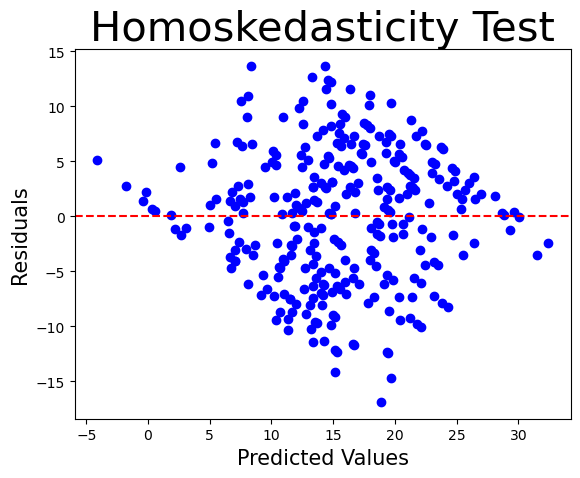

In [40]:
# 3A. Homoskedasticity
import matplotlib.pyplot as plt
 # 3A.1 Residuals-Plot for growing Variance Detection
fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 30)
plt.show()

In [ ]:
correlation matrix 행렬
vif 

In [45]:
# 3A.2 White-Test
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
pooled_OLS_dataset = pd.concat([dfc, residuals_pooled_OLS], axis=1)

exog = sm.tools.tools.add_constant(dfc[['FG%','3P%','ORB','DRB','STL' , 'covid_1']]).fillna(0)
white_test_results = het_white(pooled_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, white_test_results)))
# 3A.3 Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(pooled_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, breusch_pagan_test_results)))

{'LM-Stat': 36.81697376749725, 'LM p-val': 0.07763614517343644, 'F-Stat': 1.4688569779466236, 'F p-val': 0.07043425606630858}
{'LM-Stat': 1.5958520260764164, 'LM p-val': 0.9528751486531393, 'F-Stat': 0.2611584807690941, 'F p-val': 0.954469613670467}


In [46]:
# 3.B Non-Autocorrelation
# Durbin-Watson-Test
from statsmodels.stats.stattools import durbin_watson

durbin_watson_test_results = durbin_watson(pooled_OLS_dataset['residual']) 
print(durbin_watson_test_results)

0.8866892717150286


In [48]:
# FE und RE model
from linearmodels import PanelOLS
from linearmodels import RandomEffects
exog = sm.tools.tools.add_constant(dfc[['FG%','3P%','ORB','DRB','STL' , 'covid_1']])
endog = dfc['Rk']
# random effects model
model_re = RandomEffects(endog, exog) 
re_res = model_re.fit() 
# fixed effects model
model_fe = PanelOLS(endog, exog, entity_effects = True) 
fe_res = model_fe.fit() 
#print results
print(re_res)
print(fe_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:                     Rk   R-squared:                        0.5116
Estimator:              RandomEffects   R-squared (Between):              0.5773
No. Observations:                 300   R-squared (Within):               0.4264
Date:                Tue, Jun 06 2023   R-squared (Overall):              0.5105
Time:                        15:50:46   Log-likelihood                   -914.80
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      51.154
Entities:                          61   P-value                           0.0000
Avg Obs:                       4.9180   Distribution:                   F(6,293)
Min Obs:                       1.0000                                           
Max Obs:                       9.0000   F-statistic (robust):             42.707
                            